In [1]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
def add_more_info(df):
    df['nodes'] = (df['g1_nodes'] + df['g2_nodes']) / 2
    df['edges'] = (df['g1_edges'] + df['g2_edges']) / 2
    df['nodes^2'] = df['g1_nodes'] * df['g2_nodes']
    df['edges^2'] = df['g1_edges'] * df['g2_edges']
    df['nodes_X_edges'] = (df['g1_nodes'] * df['g1_edges'] + df['g2_nodes'] * df['g2_edges']) / 2
    df['log_nodes_X_edges'] = np.log(df['nodes_X_edges'])
    df['uncommon_nodes'] = df['nodes'] - df['generalization_nodes']
    df['log_uncommon_nodes'] = np.log(df['uncommon_nodes'])
    df['log_avg_time'] = np.log(df['avg_time'])
    df['log_nodes'] = np.log(df['nodes'])
    df['log_nodes^2'] = np.log(df['nodes^2'])
    df['uncommon_edges'] = df['edges'] - df['generalization_edges']
    df['log_uncommon_edges'] = np.log(df['uncommon_edges'])
    df['uncommon_nodes_X_uncommon_edges'] = df['uncommon_nodes'] * df['uncommon_edges']
    df['log_uncommon_nodes_X_uncommon_edges'] = np.log(df['uncommon_nodes_X_uncommon_edges'])
    df['common_nodes_X_common_edges'] = df['generalization_nodes'] * df['generalization_edges']
    df['log_common_nodes_X_common_edges'] = np.log(df['common_nodes_X_common_edges'])

In [3]:
def linear_regression_of(df, x_column, y_column, x_label=None, y_label=None, title=None):
    X = df[x_column].values.reshape(-1, 1)
    Y = df[y_column].values.reshape(-1, 1)
    linear_regressor = LinearRegression()
    linear_regressor.fit(X, Y)
    Y_pred = linear_regressor.predict(X)
    r_squared = r2_score(Y, Y_pred)

    plt.scatter(X, Y, s=5)
    plt.plot(X, Y_pred, color='red')
    if x_label is None:
        x_label = x_column
    plt.xlabel(x_label)
    if y_label is None:
        y_label = y_column
    plt.ylabel(y_label)
    if title is None:
        title = 'Linear Regression'
    plt.title(title)
    plt.show()

    data = {'coef': linear_regressor.coef_[0][0], 'intercept': linear_regressor.intercept_[0], 'r_squared': r_squared}
    print(data)

In [13]:
df = pd.read_csv("AggregatedData.csv")
may_df = pd.read_csv("ASGardData.csv")
add_more_info(df)
add_more_info(may_df)
df.head()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = geta

,directory,template,generalization_nodes,generalization_edges,generalization_node_variables,generalization_edge_variables,g1_nodes,g1_edges,g2_nodes,g2_edges,...,log_uncommon_nodes,log_avg_time,log_nodes,log_nodes^2,uncommon_edges,log_uncommon_edges,uncommon_nodes_X_uncommon_edges,log_uncommon_nodes_X_uncommon_edges,common_nodes_X_common_edges,log_common_nodes_X_common_edges
0,java.io.BufferedReader,Template1,242,241,0,0,242,241,242,241,...,-inf,6.219198,5.488938,10.977875,0.0,-inf,0.00,-inf,58322,10.973735
1,java.io.BufferedReader,Template2,139,124,31,59,227,226,295,294,...,4.804021,6.427944,5.564520,11.111925,136.0,4.912655,16592.00,9.716676,17236,9.754755
2,java.io.BufferedReader,Template3,294,293,1,1,295,294,295,294,...,0.000000,6.731495,5.686975,11.373951,1.0,0.000000,1.00,0.000000,86142,11.363752
3,java.io.BufferedReader,Template4,239,238,1,1,240,239,240,239,...,0.000000,6.096275,5.480639,10.961278,1.0,0.000000,1.00,0.000000,56882,10.948734
4,java.io.File,Template1,144,142,5,7,158,157,179,178,...,3.198673,5.363168,5.126936,10.249981,25.5,3.238678,624.75,6.437352,20448,9.925640


In [9]:
may_df.avg_time.sum() / 60_000

4.50765

In [11]:
import math
may_df = pd.read_csv("ASGardData.csv")
times_names=[f'time{i}' for i in range(5)]
may_df['avg_time'] = may_df.apply(lambda x: sum(x[times_names])/5, axis=1)
may_df['std_dev'] = may_df.apply(lambda x: math.sqrt(sum(map(lambda y: (x[y] - x['avg_time']) ** 2, times_names)) / 5), axis=1)
may_df['key'] = may_df.apply(lambda x: f"{x['directory']}-{x['template']}", axis=1)
df['key'] = df.apply(lambda x: f"{x['directory']}-{x['template']}", axis=1)
may_df

,directory,template,time0,time1,time2,time3,time4,avg_time,std_dev,key
0,java.io.BufferedReader,Template1,875,643,652,649,649,693.6,90.747121,java.io.BufferedReader-Template1
1,java.io.BufferedReader,Template2,705,682,669,689,744,697.8,25.856527,java.io.BufferedReader-Template2
2,java.io.BufferedReader,Template3,679,706,729,665,671,690.0,24.016661,java.io.BufferedReader-Template3
3,java.io.BufferedReader,Template4,665,696,659,669,704,678.6,17.939900,java.io.BufferedReader-Template4
4,java.io.File,Template10,804,823,1211,1123,789,950.0,179.675263,java.io.File-Template10
...,...,...,...,...,...,...,...,...,...,...
355,twitter4j.User,Template1,685,699,678,735,769,713.2,34.131510,twitter4j.User-Template1
356,twitter4j.User,Template2,794,761,851,786,759,790.2,33.331067,twitter4j.User-Template2
357,twitter4j.User,Template3,738,676,693,803,767,735.4,46.693040,twitter4j.User-Template3
358,twitter4j.User,Template4,783,829,829,783,857,816.2,28.971710,twitter4j.User-Template4


In [12]:
fixed = pd.merge(may_df, df[['key', 'generalization_nodes', 'generalization_edges', 'generalization_node_variables', 'generalization_edge_variables', 'g1_nodes', 'g1_edges', 'g2_nodes', 'g2_edges']], on='key')
fixed = fixed[pd.notna(fixed['time0'])]
fixed.to_csv('ASGardData.csv', index=False)
fixed

,directory,template,time0,time1,time2,time3,time4,avg_time,std_dev,key,generalization_nodes,generalization_edges,generalization_node_variables,generalization_edge_variables,g1_nodes,g1_edges,g2_nodes,g2_edges
0,java.io.BufferedReader,Template1,875,643,652,649,649,693.6,90.747121,java.io.BufferedReader-Template1,242,241,0,0,242,241,242,241
1,java.io.BufferedReader,Template2,705,682,669,689,744,697.8,25.856527,java.io.BufferedReader-Template2,139,124,31,59,227,226,295,294
2,java.io.BufferedReader,Template3,679,706,729,665,671,690.0,24.016661,java.io.BufferedReader-Template3,294,293,1,1,295,294,295,294
3,java.io.BufferedReader,Template4,665,696,659,669,704,678.6,17.939900,java.io.BufferedReader-Template4,239,238,1,1,240,239,240,239
4,java.io.File,Template10,804,823,1211,1123,789,950.0,179.675263,java.io.File-Template10,521,507,3,29,530,529,530,529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,twitter4j.User,Template1,685,699,678,735,769,713.2,34.131510,twitter4j.User-Template1,260,258,2,4,262,261,262,261
356,twitter4j.User,Template2,794,761,851,786,759,790.2,33.331067,twitter4j.User-Template2,291,288,1,5,373,372,291,290
357,twitter4j.User,Template3,738,676,693,803,767,735.4,46.693040,twitter4j.User-Template3,241,233,13,25,320,319,275,274
358,twitter4j.User,Template4,783,829,829,783,857,816.2,28.971710,twitter4j.User-Template4,367,362,7,15,375,374,383,382


In [14]:
df[df['avg_time'] > 5000]

,directory,template,generalization_nodes,generalization_edges,generalization_node_variables,generalization_edge_variables,g1_nodes,g1_edges,g2_nodes,g2_edges,...,log_uncommon_nodes,log_avg_time,log_nodes,log_nodes^2,uncommon_edges,log_uncommon_edges,uncommon_nodes_X_uncommon_edges,log_uncommon_nodes_X_uncommon_edges,common_nodes_X_common_edges,log_common_nodes_X_common_edges
5,java.io.File,Template10,521,507,3,29,530,529,530,529,...,2.197225,8.909695,6.272877,12.545754,22.0,3.091042,198.00,5.288267,264147,12.484261
13,java.io.File,Template18,513,512,0,0,513,512,513,512,...,-inf,8.859008,6.240276,12.480552,0.0,-inf,0.00,-inf,262656,12.478600
38,java.io.InputStreamReader,Template3,465,455,13,31,484,483,514,513,...,3.526361,8.602526,6.212606,12.424308,43.0,3.761200,1462.00,7.287561,211575,12.262335
46,java.io.PrintWriter,Template3,545,544,0,0,545,544,545,544,...,-inf,9.067266,6.300786,12.601572,0.0,-inf,0.00,-inf,296480,12.599735
65,java.net.URI,Template1,435,434,0,0,435,434,435,434,...,-inf,8.533381,6.075346,12.150692,0.0,-inf,0.00,-inf,188790,12.148391
82,java.util.Arrays,Template1,776,743,5,68,814,813,805,804,...,3.511545,12.741428,6.696417,13.392803,65.5,4.182050,2194.25,7.693596,576568,13.264849
163,java.util.Properties,Template1,531,530,6,6,537,536,537,536,...,1.791759,9.005712,6.285998,12.571996,6.0,1.791759,36.00,3.583519,281430,12.547639
170,java.util.Properties,Template8,358,357,4,4,416,415,360,359,...,3.401197,8.871505,5.961005,11.916789,30.0,3.401197,900.00,6.802395,127806,11.758269
171,java.util.Properties,Template9,471,464,13,23,502,501,518,517,...,3.663562,8.774143,6.234411,12.468575,45.0,3.806662,1755.00,7.470224,218544,12.294743
185,javax.jms.MessageConsumer,Template3,500,484,13,38,547,546,606,605,...,4.337291,8.935509,6.356975,12.711329,91.5,4.516339,6999.75,8.853630,242000,12.396693


In [19]:
times_names = [f'time{i}' for i in range(5)]
times_names.append('avg_time')
times_names.append('std_dev')
plt_df[plt_df.avg_time.notnull()].sum()[times_names] / 60_000

time0       4.373517
time1        4.49625
time2       4.508183
time3       4.495083
time4         4.4952
avg_time    4.505293
std_dev     0.098096
dtype: object

In [18]:
plt_df.describe()[['nodes', 'edges', 'avg_time', 'std_dev']]

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,nodes,edges,avg_time,std_dev
count,356.000000,356.000000,356.000000,356.000000
mean,214.988764,213.988764,759.319101,16.533055
std,116.407092,116.407092,1334.500518,25.766511
min,39.500000,38.500000,4.000000,0.000000
25%,120.500000,119.500000,69.200000,3.119551
50%,194.500000,193.500000,244.750000,7.172584
75%,291.125000,290.125000,838.825000,18.923994
max,576.500000,575.500000,8561.400000,204.512225


In [38]:
quantile = df['avg_time'].quantile(0.95)
plt_df = df[df['avg_time'] < quantile]

<Axes: xlabel='nodes', ylabel='time (ms)'>

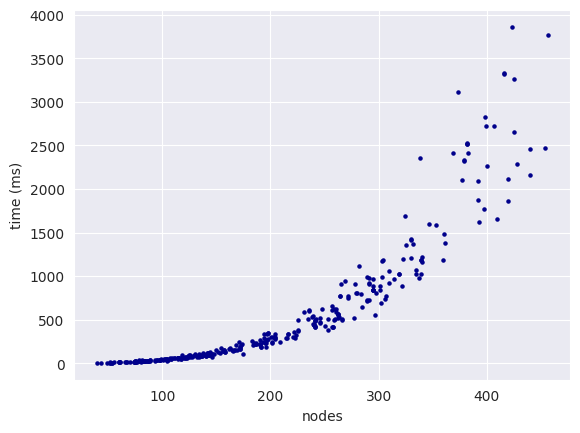

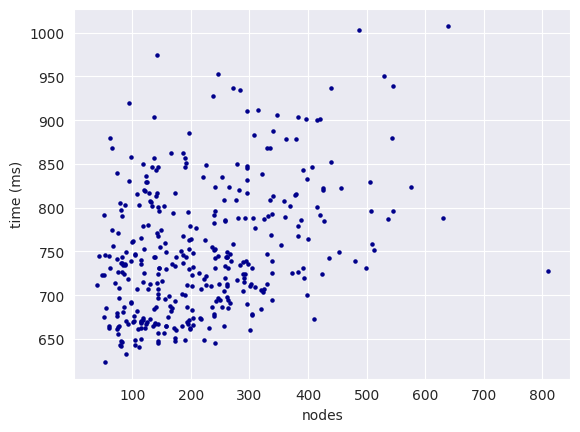

In [39]:
plt_df.plot.scatter(x='nodes', y='avg_time', c='DarkBlue', s=5, ylabel='time (ms)', xlabel='nodes')
may_df.plot.scatter(x='nodes', y='avg_time', c='DarkBlue', s=5, ylabel='time (ms)', xlabel='nodes')

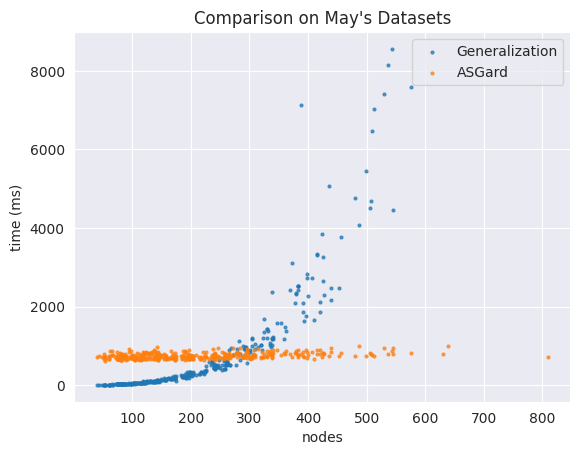

In [25]:
# Create a scatter plot for all metrics
plt.scatter(plt_df['nodes'], plt_df['avg_time'], label='Generalization', s=4, alpha=0.7)
plt.scatter(may_df['nodes'], may_df['avg_time'], label='ASGard', s=4, alpha=0.7)

# Customize the plot
plt.xlabel('nodes')
plt.ylabel('time (ms)')
plt.title('Comparison on May\'s Datasets')
plt.legend()

# Display the plot
plt.show()

<Axes: xlabel='edges', ylabel='time (ms)'>

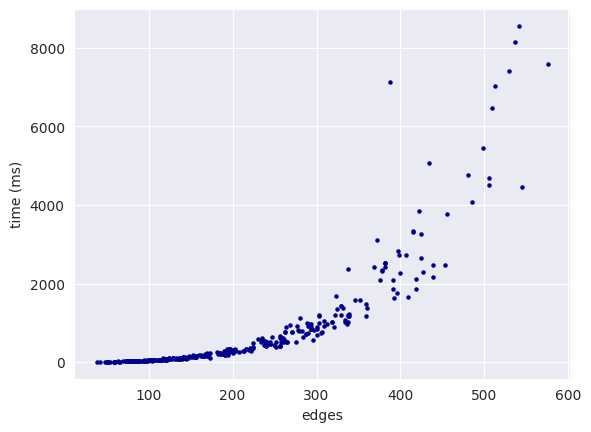

In [27]:
plt_df.plot.scatter(x='edges', y='avg_time', c='DarkBlue', s=5, ylabel='time (ms)', xlabel='edges')

<Axes: xlabel='uncommon nodes', ylabel='time (ms)'>

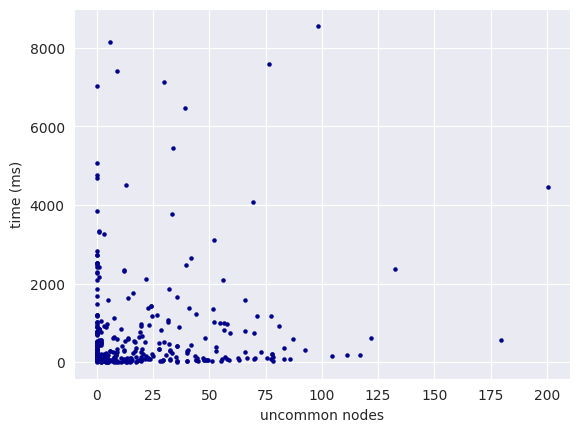

In [28]:
plt_df.plot.scatter(x='uncommon_nodes', y='avg_time', c='DarkBlue', s=5, ylabel='time (ms)', xlabel='uncommon nodes')

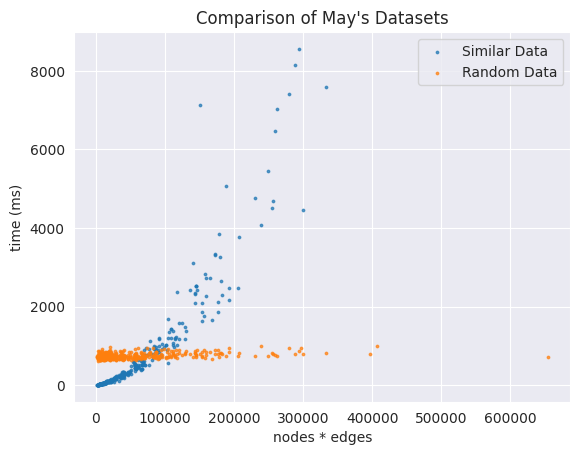

In [29]:
# Create a scatter plot for all metrics
plt.scatter(plt_df['nodes_X_edges'], plt_df['avg_time'], label='Similar Data', s=3, alpha=0.7)
plt.scatter(may_df['nodes_X_edges'], may_df['avg_time'], label='Random Data', s=3, alpha=0.7)

# Customize the plot
plt.xlabel('nodes * edges')
plt.ylabel('time (ms)')
plt.title('Comparison of May\'s Datasets')
plt.legend()

# Display the plot
plt.show()

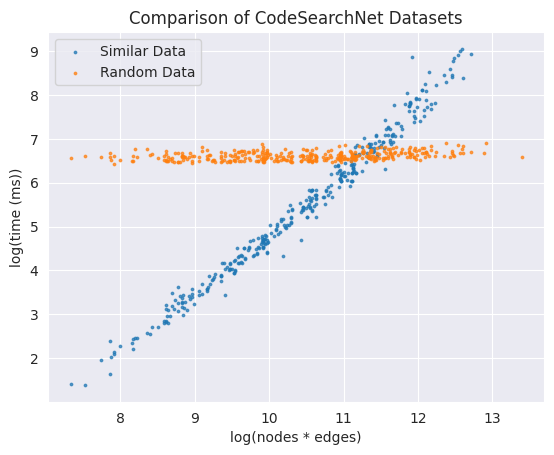

In [31]:
# Create a scatter plot for all metrics
plt.scatter(plt_df['log_nodes_X_edges'], plt_df['log_avg_time'], label='Similar Data', s=3, alpha=0.7)
plt.scatter(may_df['log_nodes_X_edges'], may_df['log_avg_time'], label='Random Data', s=3, alpha=0.7)

# Customize the plot
plt.xlabel('log(nodes * edges)')
plt.ylabel('log(time (ms))')
plt.title('Comparison of CodeSearchNet Datasets')
plt.legend()

# Display the plot
plt.show()

<Axes: xlabel='common nodes', ylabel='time (ms)'>

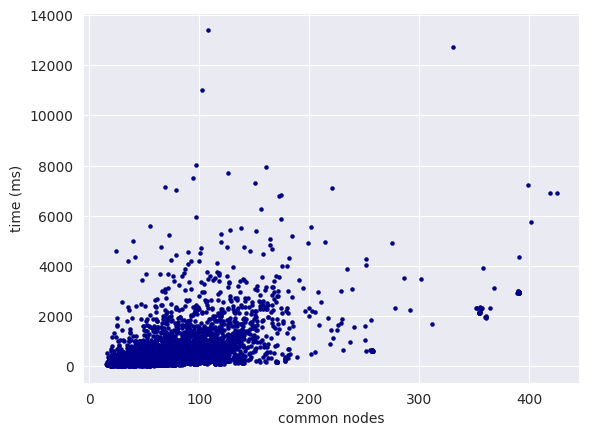

In [91]:
df.plot.scatter(x='generalization_nodes', y='avg_time', c='DarkBlue', s=5, ylabel='time (ms)', xlabel='common nodes')

<Axes: xlabel='common edges', ylabel='time (ms)'>

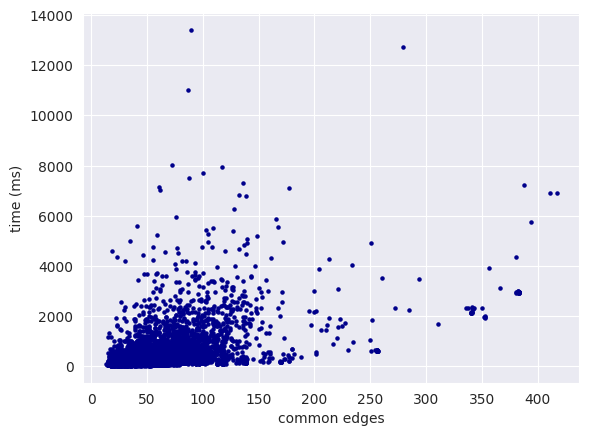

In [92]:
df.plot.scatter(x='generalization_edges', y='avg_time', c='DarkBlue', s=5, ylabel='time (ms)', xlabel='common edges')

<Axes: xlabel='uncommon edges', ylabel='time (ms)'>

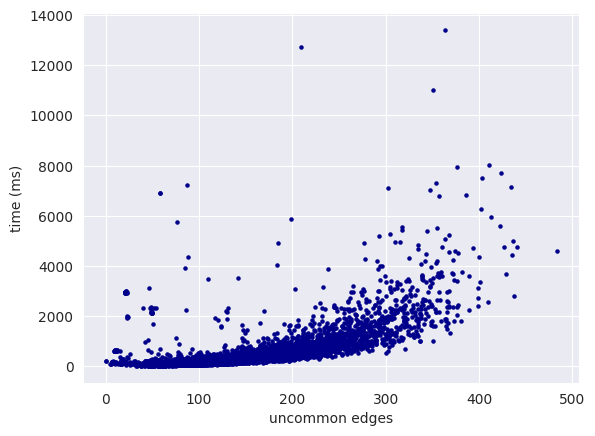

In [93]:
df.plot.scatter(x='uncommon_edges', y='avg_time', c='DarkBlue', s=5, ylabel='time (ms)', xlabel='uncommon edges')

<Axes: xlabel='log(uncommon edges)', ylabel='log(time (ms))'>

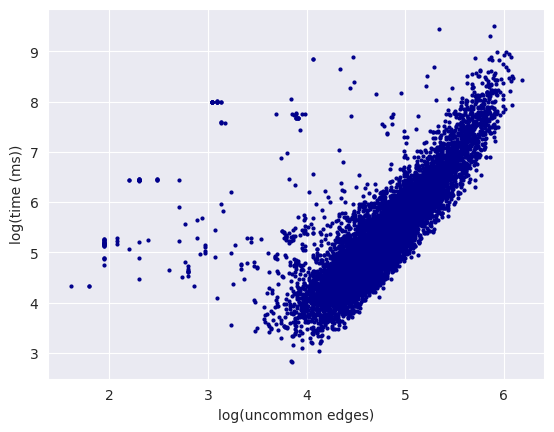

In [94]:
df.plot.scatter(x='log_uncommon_edges', y='log_avg_time', c='DarkBlue', s=4, ylabel='log(time (ms))', xlabel='log(uncommon edges)')

<Axes: xlabel='log(uncommon nodes)', ylabel='log(time (ms))'>

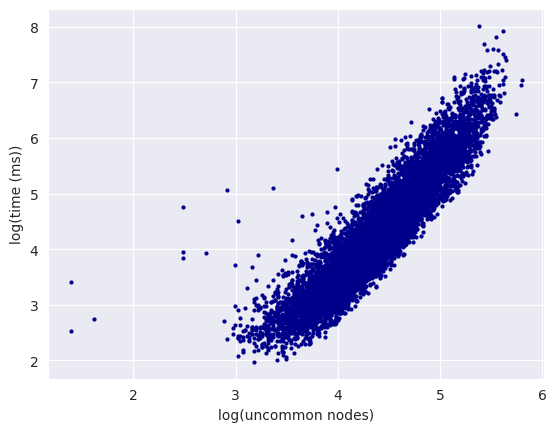

In [8]:
df.plot.scatter(x='log_uncommon_nodes', y='log_avg_time', c='DarkBlue', s=4, ylabel='log(time (ms))', xlabel='log(uncommon nodes)')

<Axes: xlabel='log(nodes)', ylabel='log(time (ms))'>

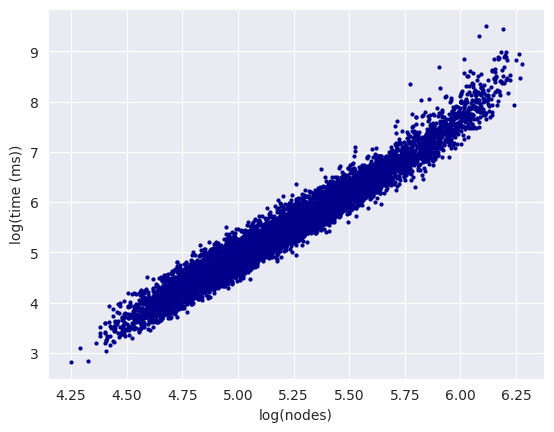

In [97]:
df.plot.scatter(x='log_nodes', y='log_avg_time', c='DarkBlue', s=4, ylabel='log(time (ms))', xlabel='log(nodes)')

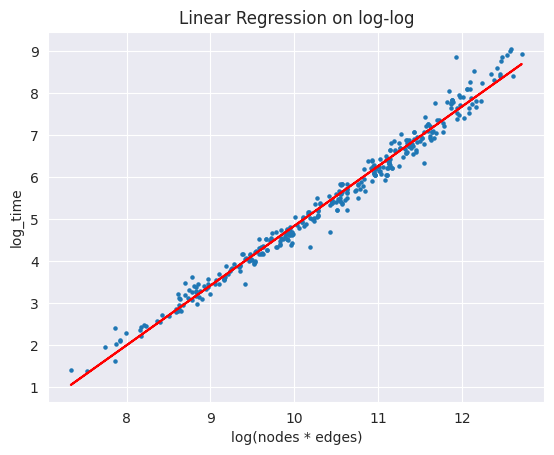

{'coef': 1.4212957281689615, 'intercept': -9.375425971171099, 'r_squared': 0.9824003522089585}


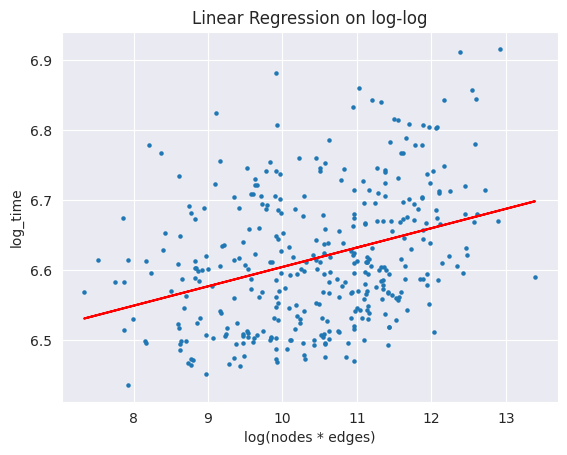

{'coef': 0.02765177288919679, 'intercept': 6.3277736067932455, 'r_squared': 0.1143538913700125}


In [32]:
linear_regression_of(plt_df, 'log_nodes_X_edges', 'log_avg_time', x_label='log(nodes * edges)', y_label='log_time', title='Linear Regression on log-log')
linear_regression_of(may_df, 'log_nodes_X_edges', 'log_avg_time', x_label='log(nodes * edges)', y_label='log_time', title='Linear Regression on log-log')

<Axes: xlabel='uncommon nodes * uncommon edges', ylabel='time (ms)'>

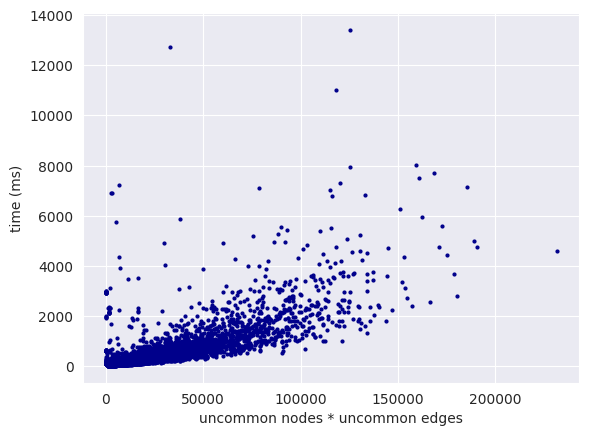

In [100]:
df.plot.scatter(x='uncommon_nodes_X_uncommon_edges', y='avg_time', c='DarkBlue', s=4, ylabel='time (ms)', xlabel='uncommon nodes * uncommon edges')

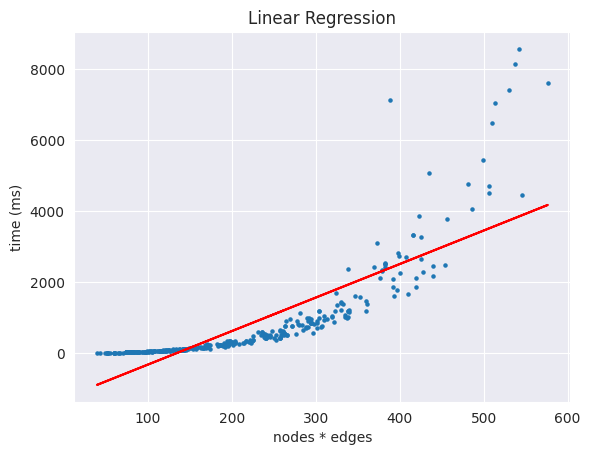

{'coef': 9.435673064689913, 'intercept': -1269.244588986256, 'r_squared': 0.6774342634360777}


In [33]:
linear_regression_of(plt_df, 'nodes', 'avg_time', x_label='nodes * edges', y_label='time (ms)', title='Linear Regression')

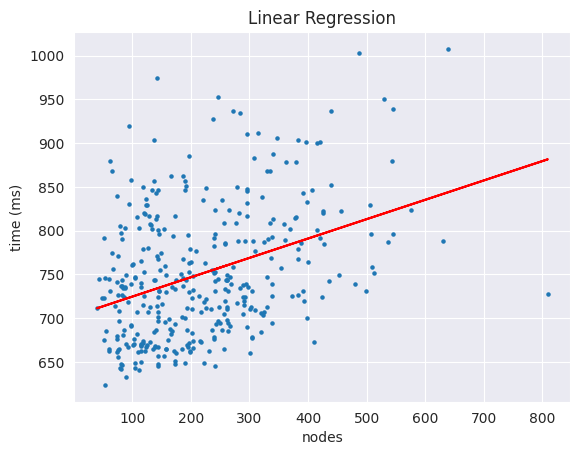

{'coef': 0.22116953136794681, 'intercept': 702.6419703115212, 'r_squared': 0.13726078967752697}


In [35]:
linear_regression_of(may_df, 'nodes', 'avg_time', x_label='nodes', y_label='time (ms)', title='Linear Regression')

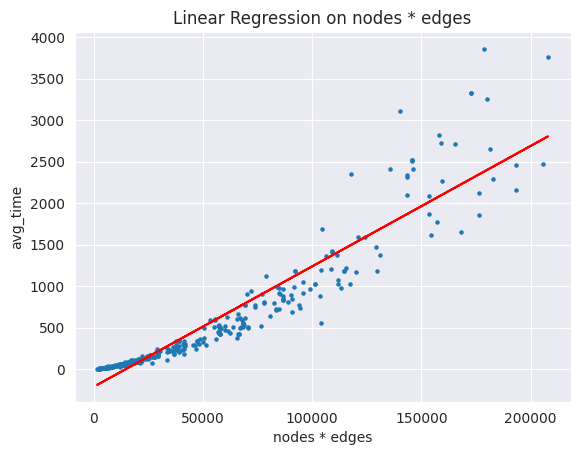

{'coef': 0.014510174201549137, 'intercept': -211.0901457584481, 'r_squared': 0.8853063994589827}


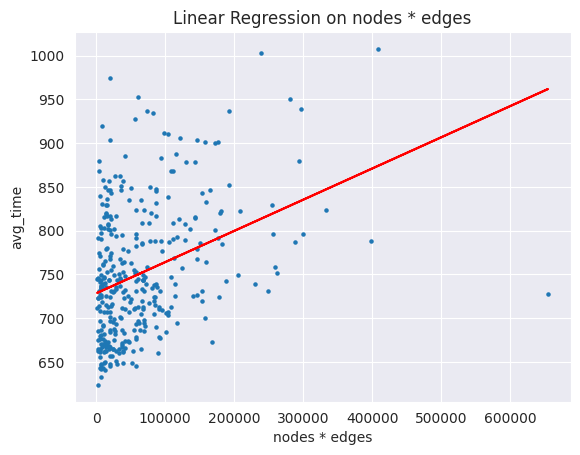

{'coef': 0.00035687673868911644, 'intercept': 728.4094523343465, 'r_squared': 0.12791455779474392}


In [40]:
linear_regression_of(plt_df, 'nodes_X_edges', 'avg_time', x_label='nodes * edges', y_label='avg_time', title='Linear Regression on nodes * edges')
linear_regression_of(may_df, 'nodes_X_edges', 'avg_time', x_label='nodes * edges', y_label='avg_time', title='Linear Regression on nodes * edges')

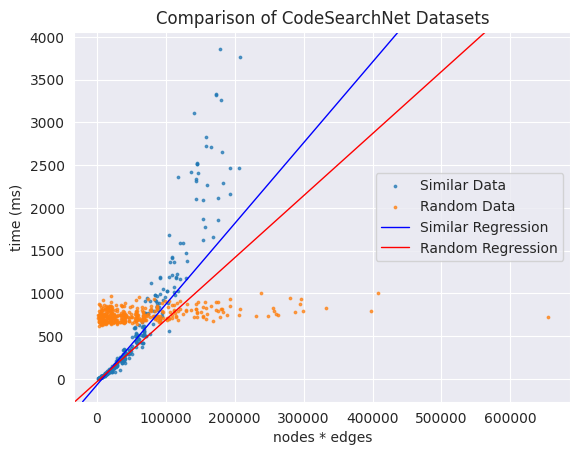

In [41]:
# Create a scatter plot for all metrics
plt.scatter(plt_df['nodes_X_edges'], plt_df['avg_time'], label='Similar Data', s=3, alpha=0.7)
plt.scatter(may_df['nodes_X_edges'], may_df['avg_time'], label='Random Data', s=3, alpha=0.7)
plt.axline((0, -71.05662889952936), (71.05662889952936/0.00944322735515848, 0), linewidth=1, color='b', label='Similar Regression')
plt.axline((0, -34.16747831015266), (34.16747831015266/0.007256707705568302, 0), linewidth=1, color='r', label='Random Regression')

# Customize the plot
plt.xlabel('nodes * edges')
plt.ylabel('time (ms)')
plt.title('Comparison of CodeSearchNet Datasets')
plt.legend()

# Display the plot
plt.show()

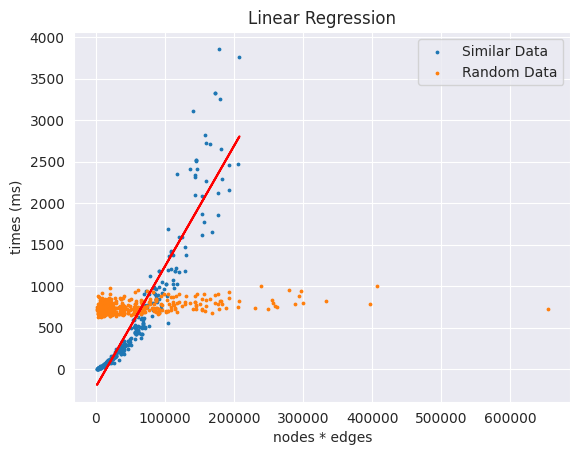

{'coef': 0.014510174201549137, 'intercept': -211.0901457584481, 'r_squared': 0.8853063994589827, 'r_squared_random': -201.25061653579343}


In [42]:
x_column = 'nodes_X_edges'
y_column = 'avg_time'

X = plt_df[x_column].values.reshape(-1, 1)
Y = plt_df[y_column].values.reshape(-1, 1)
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)
r_squared = r2_score(Y, Y_pred)

plt.scatter(X, Y, s=3, label='Similar Data')
plt.plot(X, Y_pred, color='red')

X = may_df[x_column].values.reshape(-1, 1)
Y = may_df[y_column].values.reshape(-1, 1)
Y_pred = linear_regressor.predict(X)
r_squared_random = r2_score(Y, Y_pred)
plt.scatter(X, Y, s=3, label='Random Data')

plt.xlabel('nodes * edges')
plt.ylabel('times (ms)')
plt.title('Linear Regression')
plt.legend()
plt.show()

data = {'coef': linear_regressor.coef_[0][0], 'intercept': linear_regressor.intercept_[0], 'r_squared': r_squared, 'r_squared_random': r_squared_random}
print(data)